<a href="https://colab.research.google.com/github/sahiltambe18/ML_notebooks/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv("/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Gender will now contain 0 for male and 1 for female

# Fit and transform the column
df['Stream'] = label_encoder.fit_transform(df['Stream'])

# Map the encoded values to desired values
encoded_mapping = {'Computer Science': 3, 'Information Technology': 2, 'Electronics And Communication': 1}
df['Stream'] = df['Stream'].map(encoded_mapping)

# 'department_encoded' column will now contain 3 for "CE", 2 for "IT", and 1 for "ENTC"



In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2966 non-null   int64  
 1   Gender             2966 non-null   int64  
 2   Stream             0 non-null      float64
 3   Internships        2966 non-null   int64  
 4   CGPA               2966 non-null   int64  
 5   Hostel             2966 non-null   int64  
 6   HistoryOfBacklogs  2966 non-null   int64  
 7   PlacedOrNot        2966 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 185.5 KB


In [70]:
#gives the sum of null values in each attribute
df.isnull().sum()

Age                     0
Gender                  0
Stream               2966
Internships             0
CGPA                    0
Hostel                  0
HistoryOfBacklogs       0
PlacedOrNot             0
dtype: int64

In [71]:
#corelation between attr
df.corr()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,-0.021538,NaN,0.006552,-0.119787,0.003042,-0.042586,0.046943
Gender,-0.021538,1.000000,NaN,-0.081526,-0.003512,-0.200254,0.026153,-0.006705
Stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Internships,0.006552,-0.081526,NaN,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,-0.003512,NaN,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,-0.200254,NaN,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,0.026153,NaN,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,-0.006705,NaN,0.179334,0.588648,-0.038182,-0.022337,1.000000


<Axes: >

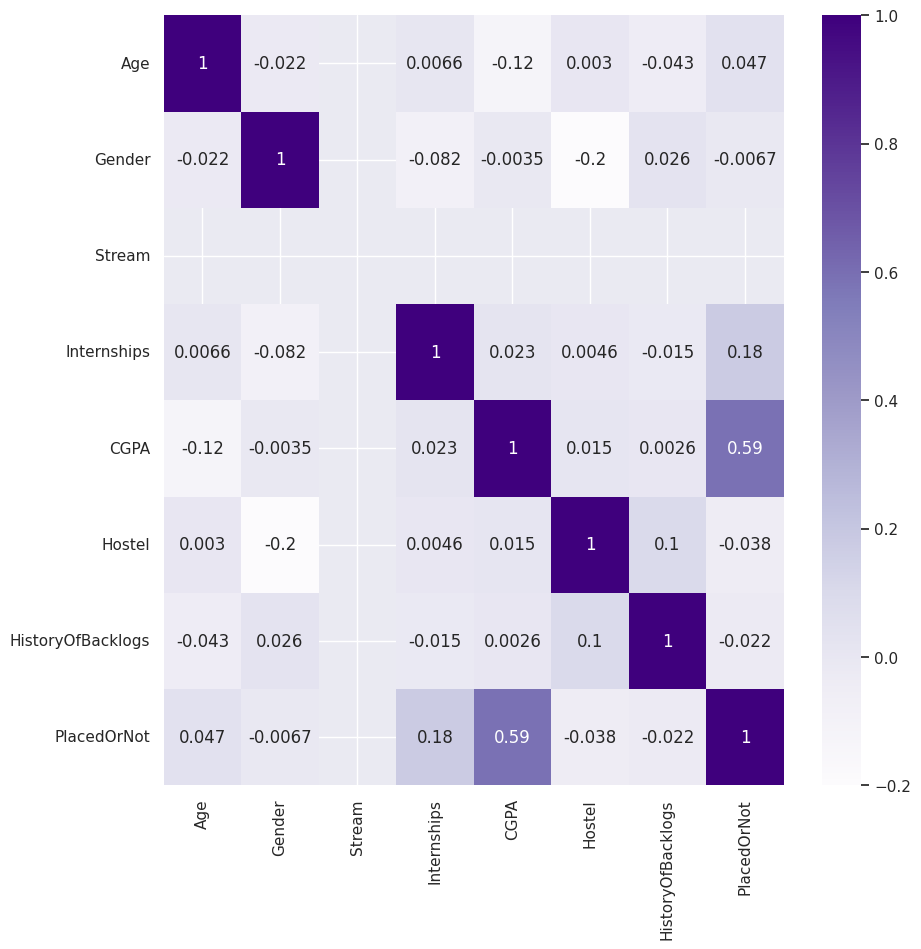

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Purples")

Text(0, 0.5, 'placed')

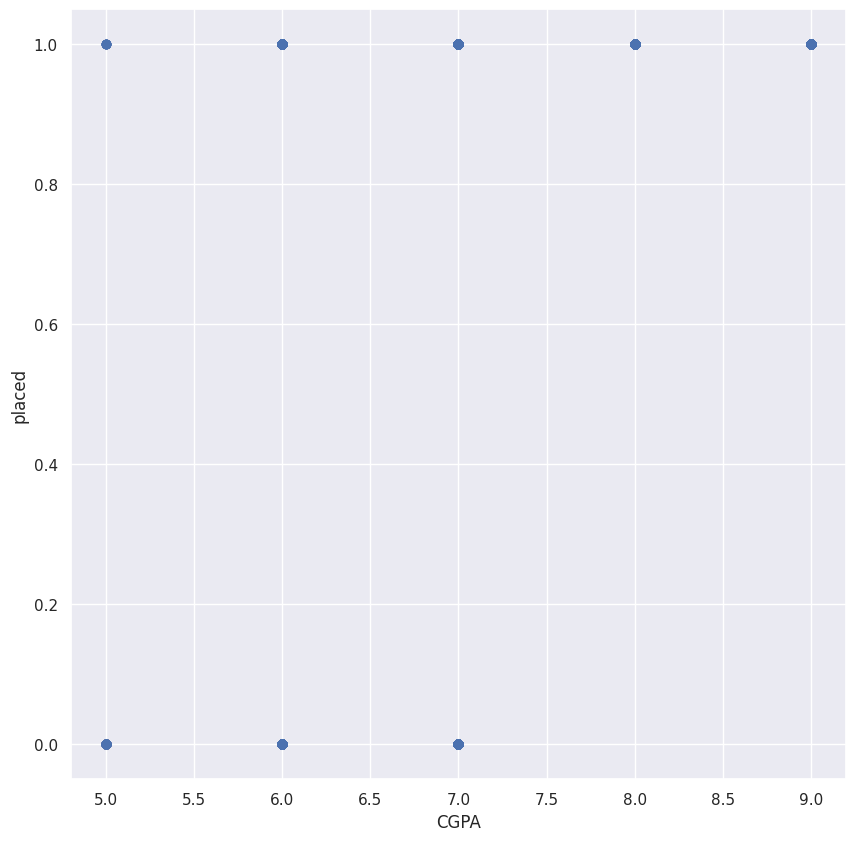

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(df['CGPA'] , df['PlacedOrNot'])
plt.xlabel(xlabel="CGPA")
plt.ylabel(ylabel="placed")

<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

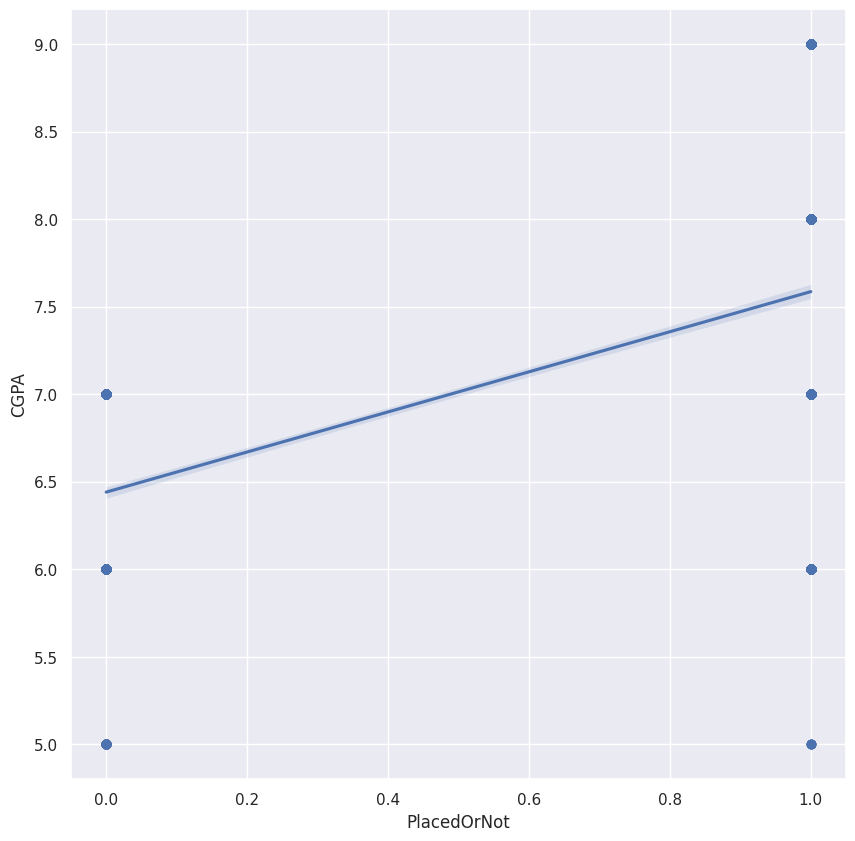

In [74]:
plt.subplots(figsize=(10,10))
sns.regplot(data=df,x=df['PlacedOrNot'],y=df['CGPA'])

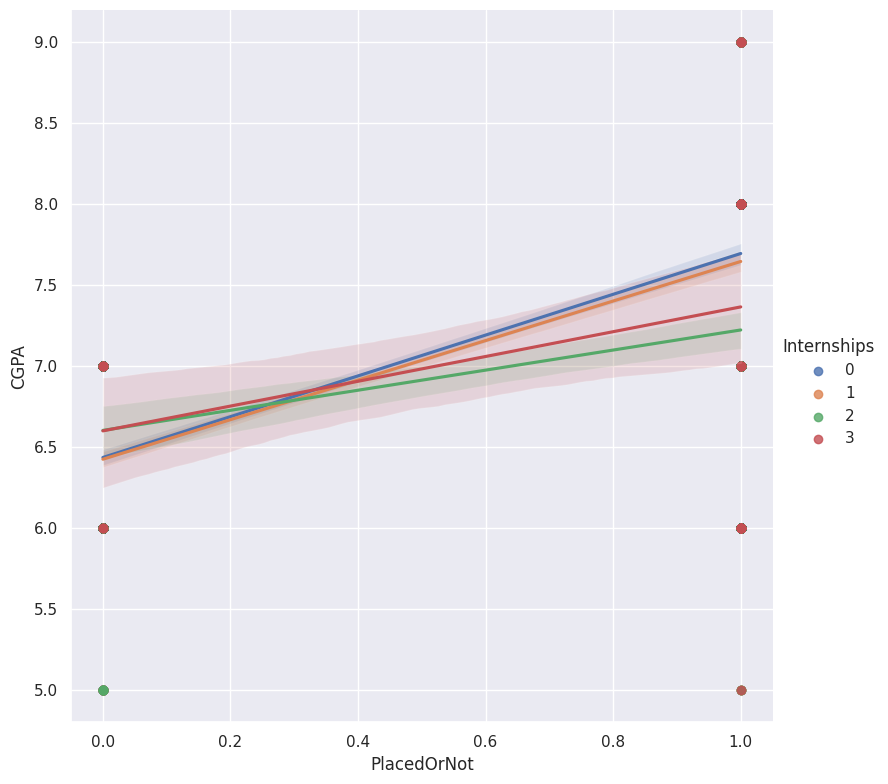

In [75]:
sns.lmplot(x="PlacedOrNot",y="CGPA",data=df,hue="Internships",height=8)

In [76]:
pricer = df[df['CGPA']>=7]
pricer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2036 non-null   int64  
 1   Gender             2036 non-null   int64  
 2   Stream             0 non-null      float64
 3   Internships        2036 non-null   int64  
 4   CGPA               2036 non-null   int64  
 5   Hostel             2036 non-null   int64  
 6   HistoryOfBacklogs  2036 non-null   int64  
 7   PlacedOrNot        2036 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 143.2 KB


<ipython-input-77-4174c32d5516>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pricer["PlacedOrNot"])


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

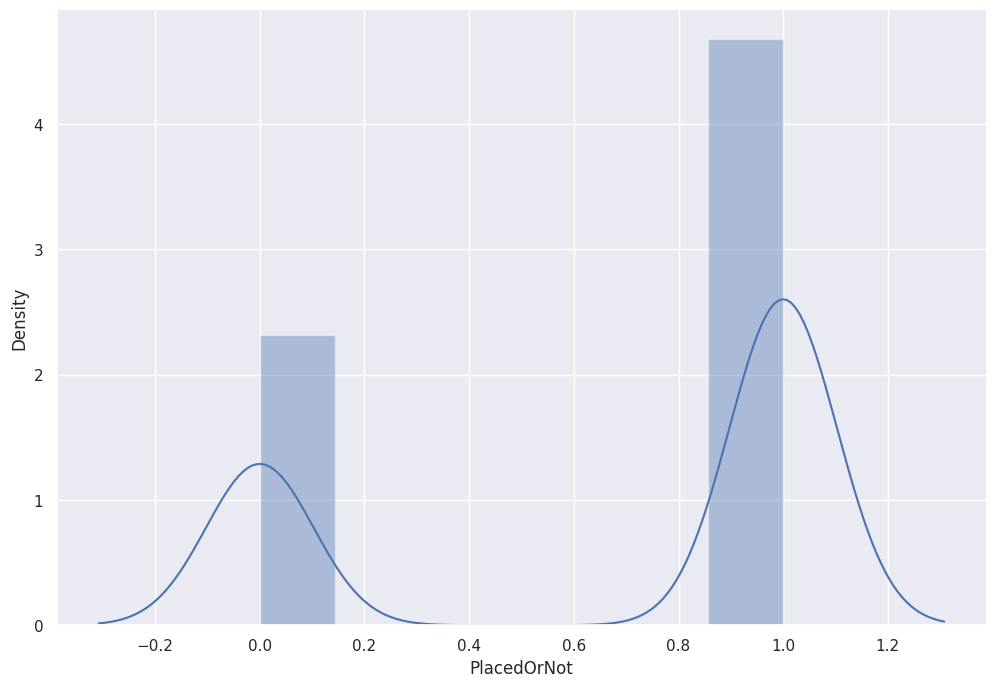

In [77]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(pricer["PlacedOrNot"])

<ipython-input-78-43ff82f2fdea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

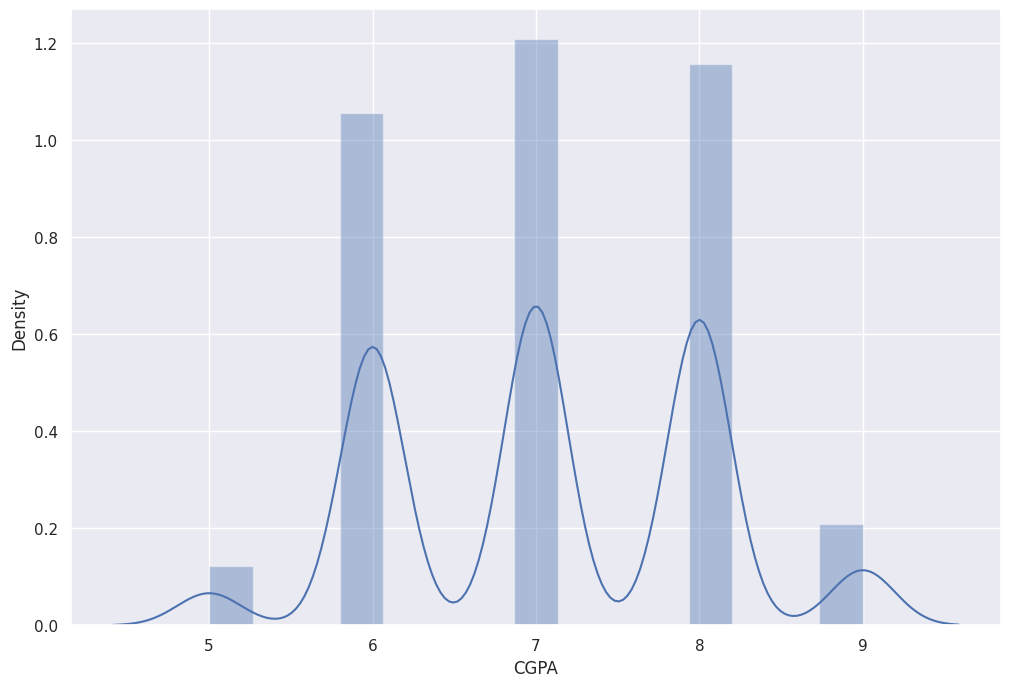

In [78]:
plt.subplots(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.distplot(df['CGPA'])

In [79]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,NaN,1,8,1,1,1
1,21,0,NaN,0,7,1,1,1
2,22,0,NaN,1,6,0,0,1
3,21,1,NaN,0,8,0,1,1
4,22,1,NaN,0,8,1,0,1


In [80]:
x = df[['CGPA','Internships','Gender','Stream']]
y = df[['PlacedOrNot']]

In [81]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state=1)


In [82]:
print(f"sizes of splitted data")
print(f"x train {x_train.shape}")
print(f"x test {x_test.shape}")
print(f"y train {y_train.shape}")
print(f"y test {y_test.shape}")

sizes of splitted data
x train (2224, 4)
x test (742, 4)
y train (2224, 1)
y test (742, 1)


In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

D_tree = DecisionTreeRegressor(random_state=1)
R_forest = RandomForestRegressor(random_state=1)
L_reg = LogisticRegression(random_state=1 , solver='lbfgs',max_iter=10000)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2966 non-null   int64  
 1   Gender             2966 non-null   int64  
 2   Stream             0 non-null      float64
 3   Internships        2966 non-null   int64  
 4   CGPA               2966 non-null   int64  
 5   Hostel             2966 non-null   int64  
 6   HistoryOfBacklogs  2966 non-null   int64  
 7   PlacedOrNot        2966 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 185.5 KB


In [85]:
# D_tree.fit(x_train,y_train)

from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.

# Fit and transform the imputer on data
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

In [89]:
D_tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [86]:
R_forest.fit(x_train,y_train)

<ipython-input-86-87872f44ef78>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_forest.fit(x_train,y_train)


RandomForestRegressor(random_state=1)

In [87]:
L_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000, random_state=1)

In [91]:
y_pred_dt = D_tree.predict(x_test)
y_pred_rf = R_forest.predict(x_test)
y_pred_lr = L_reg.predict(x_test)


# print(y_pred_dt)
# y_test = y_test.astype(float)
# y_pred_dt = y_pred_dt.astype(float)
# print(y_test)
# y_test.info()
# y_pred_dt.info()

In [94]:
# result = pd.DataFrame({"actual":y_test ,"predicted": y_pred_dt})

result = pd.DataFrame({"actual": y_test.to_numpy().ravel(), "predicted": y_pred_dt})
result

,actual,predicted
0,0,0.234127
1,0,0.313305
2,0,0.234127
3,1,0.234127
4,1,0.313305
...,...,...
737,1,1.000000
738,1,1.000000
739,1,0.205674
740,1,1.000000


In [99]:
 # Converting probabilities to binary predictions
y_pred_dt = (y_pred_dt >= 0.5).astype(int)
y_pred_rf = (y_pred_rf >= 0.5).astype(int)
y_pred_lr = (y_pred_lr >= 0.5).astype(int)

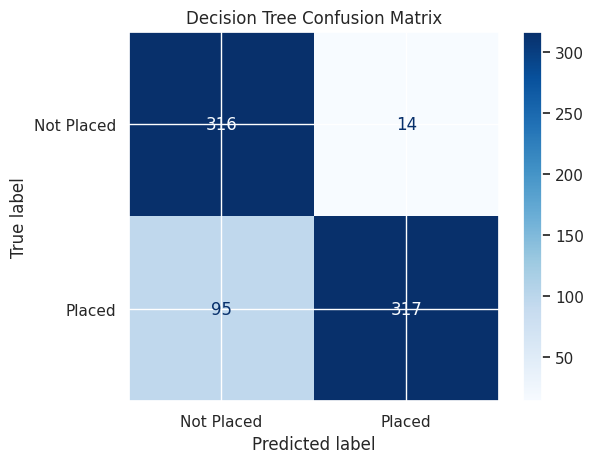

Accuracy: 0.8530997304582211
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       330
           1       0.96      0.77      0.85       412

    accuracy                           0.85       742
   macro avg       0.86      0.86      0.85       742
weighted avg       0.87      0.85      0.85       742



In [100]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Placed", "Placed"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Confusion Matrix')
plt.show()

# accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy}")

# classification report
print(classification_report(y_test, y_pred_dt))


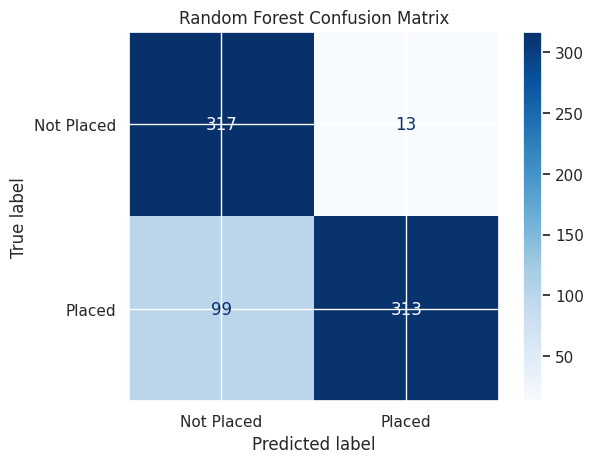

Accuracy: 0.8490566037735849
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       330
           1       0.96      0.76      0.85       412

    accuracy                           0.85       742
   macro avg       0.86      0.86      0.85       742
weighted avg       0.87      0.85      0.85       742



In [101]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Placed", "Placed"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

# accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

# classification report
print(classification_report(y_test, y_pred_rf))

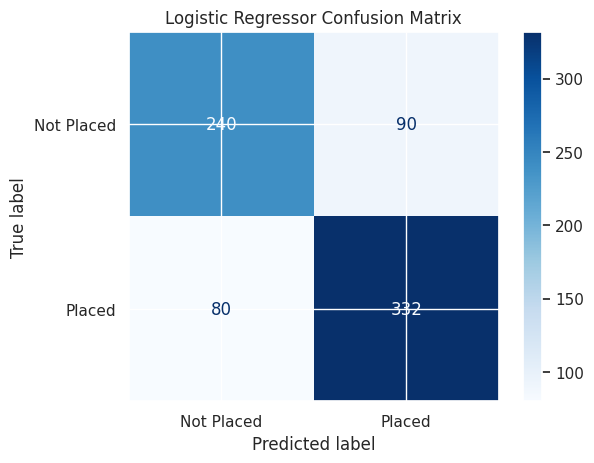

Accuracy: 0.77088948787062
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       330
           1       0.79      0.81      0.80       412

    accuracy                           0.77       742
   macro avg       0.77      0.77      0.77       742
weighted avg       0.77      0.77      0.77       742



In [102]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not Placed", "Placed"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regressor Confusion Matrix')
plt.show()

# accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")

# classification report
print(classification_report(y_test, y_pred_lr))